<center><img src="http://mdst.eecs.umich.edu/images/mdst-logo-circle.png" width=350></center>

# Introduction to Neural Networks

To use neural networks effectively requires a little more theoretical background than other machine learning approaches.  Today we will cover the bare-minimum to get us started.  We will begin by remembering what a likelihood function is.

In [15]:
# Let's import some libraries!
%matplotlib inline
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn

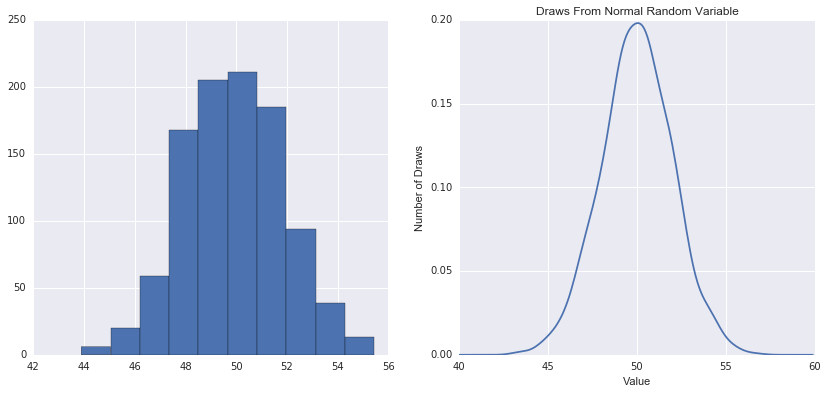

In [39]:
# We create a norma random variable with mean 50 and standard deviation 2
mu = 50
sigma=2

norm = stats.norm(50,2)
data = norm.rvs(1000)

fig = plt.figure()
plt.subplot(121)
bins = plt.hist(samps)
plt.subplot(122)
kern = stats.gaussian_kde(data)
x = np.arange(40,60,0.1)
plt.plot(x, kern(x))
plt.xlabel('Value')
plt.ylabel('Number of Draws')
plt.title('Draws From Normal Random Variable')


fig.set_size_inches(14,6)

In [19]:
# In this cell we will define the likelihood function for estimating the mean of a normal distribution.

def likelihood(x, data, sigma=2):
    return (2*np.pi*sigma**2)**(len(data)/2)*np.exp((-1/(2**sigma**2))*((data - x)**2).sum())

In [ ]:
xx = np.arange(40,60,0.1)
fxx = np.array([likelihood(x, samps) for x in xx])
plt.plot(xx, fxx)

In [24]:
# That doesn't work...how about log likelihood?

def log_likelihood(x, data, sigma=2):
    return -1*len(data)/2*np.log(2*np.pi) - (len(data)/2)*np.log(sigma**2) - (1/(2*sigma**2))*((data - x)**2).sum()

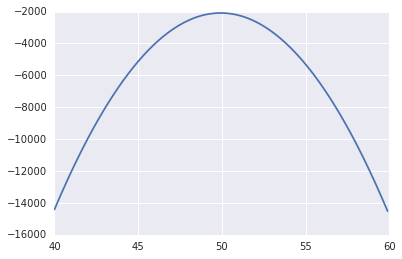

In [32]:
xx = np.arange(40,60,0.1)
fxx = np.array([log_likelihood(x, samps) for x in xx])
plt.plot(xx, fxx)

## Boardwork.

Drawing the right pictures to talk about neural networks is a pain.  We will resort to the board for a few minutes.

## Tensorflow

Building a good neural network is more difficult than the other algorithms we have discussed so far in our tutorial series.  Scikit-learn actually has a simple neural network classifier, however in the coming weeks we will need more customization than is offered there.

Tensorflow is a neural network toolkit created by google. There are others out there, for example theano.  I think that tensorflow is pretty easy though.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [40]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden = 256 # 1st layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [44]:
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)

    # Output layer with linear activation
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

In [45]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden])),
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Initialize the model
pred = multilayer_perceptron(x, weights, biases)

# Define a cost function and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

In [46]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 cost= 18.553334791
Epoch: 0002 cost= 5.213683576
Epoch: 0003 cost= 3.427124850
Epoch: 0004 cost= 2.556800000
Epoch: 0005 cost= 1.985732856
Epoch: 0006 cost= 1.583021481
Epoch: 0007 cost= 1.273501926
Epoch: 0008 cost= 1.030094397
Epoch: 0009 cost= 0.842288567
Epoch: 0010 cost= 0.690654258
Epoch: 0011 cost= 0.554295615
Epoch: 0012 cost= 0.456010018
Epoch: 0013 cost= 0.376583050
Epoch: 0014 cost= 0.303671977
Epoch: 0015 cost= 0.237188765
Optimization Finished!
Accuracy: 0.9433
